<a href="https://colab.research.google.com/github/asksawant/tmdb-movies-analysis-onyx-zoomcharts/blob/main/data_modelling_example_tmdb_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Modelling for TMDB Dataset


## Introduction

This notebook focuses on data modelling for the TMDB (The Movie Database) dataset. The dataset contains information about movies, including details such as title, rating, release date, revenue, production companies, genres, etc. Our objective is to prepare the data for analysis and reporting.

## Importing Libraries

We start by importing necessary libraries such as Pandas, NumPy, and re (regular expressions) for data manipulation and cleaning.

In [1]:
# @title
import pandas as pd
import numpy as np
import re

## Data Overview

Before diving into data cleaning and modelling, let's understand the structure and content of the dataset. Here are the key columns and their descriptions:

- **id**: Unique identifier for each movie in the TMDB
- **title**: The official title of the movie
- **vote_average**: Average rating of the movie on a scale from 0 to 10
- **vote_count**: Number of votes that contributed to the movie's rating
- **status**: Current release status of the movie (e.g., Released, Post Production)
- **release_date**: Date when the movie was officially released
- **revenue**: Box office earnings of the movie
- **runtime**: Duration of the movie in minutes
- **budget**: Financial budget allocated for the movie production
- **imdb_id**: Identifier for the movie in the Internet Movie Database (IMDb)
- **original_language**: The language in which the movie was originally produced
- **original_title**: The title of the movie in its original language
- **overview**: A brief description or summary of the movie's plot
- **popularity**: A metric indicating the relative popularity of the movie
- **tagline**: A memorable phrase or slogan associated with the movie
- **genres**: The categories or genres that the movie belongs to (e.g., Action, Comedy, Drama)
- **production_companies**: The companies or studios involved in the production of the movie
- **production_countries**: countries of production and co-production companies which made the movie/TV Show
- **spoken_languages**: The languages spoken in the movie
- **cast**: The actors and actresses who appear in the movie
- **director**: The individual responsible for directing the movie
- **director_of_photography**: The person in charge of the cinematography or camera work
- **writers**: The individuals who wrote the screenplay or story for the movie
- **producers**: The individuals or entities responsible for overseeing the production of the movie
- **music_composer**: The composer responsible for creating the movie's music or score

Following is the raw file info.

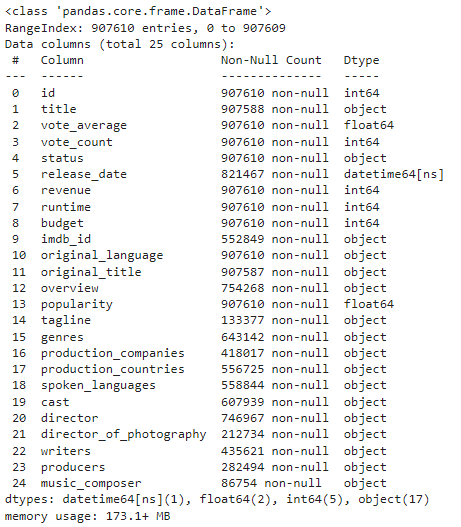

Following is the info of the missing values % from the raw dataset.

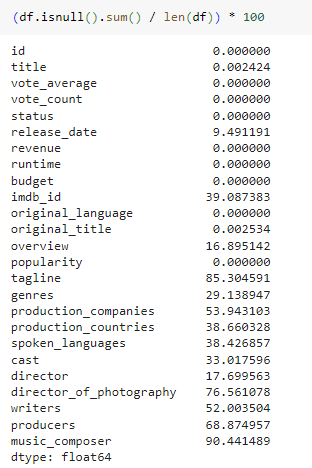

I have already selected few columns to showcase how to do data modelling for the challenge.You can focus on a subset of the data relevant to your analysis

## Reading the file

We read the dataset from an Excel file into a Pandas DataFrame.

In [2]:
file_path = "/content/drive/MyDrive/Business_Files/Practice/OnyxDataDNA/TMDB_Movies/data/SelectedColumnsRawDatasetTMDBMovies2024.xlsx"
df = pd.read_excel(file_path)
df.head(3)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,original_language,genres,production_companies
0,2,Ariel,7.082,304,Released,1988-10-21 00:00:00,0,73,0,tt0094675,fi,"Drama, Comedy, Romance, Crime",Villealfa Filmproductions
1,3,Shadows in Paradise,7.302,344,Released,1986-10-17 00:00:00,0,74,0,tt0092149,fi,"Drama, Comedy, Romance",Villealfa Filmproductions
2,5,Four Rooms,5.800,2534,Released,1995-12-09 00:00:00,4257354,98,4000000,tt0113101,en,Comedy,"Miramax, A Band Apart"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907610 entries, 0 to 907609
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    907610 non-null  int64  
 1   title                 907588 non-null  object 
 2   vote_average          907610 non-null  float64
 3   vote_count            907610 non-null  int64  
 4   status                907610 non-null  object 
 5   release_date          821467 non-null  object 
 6   revenue               907610 non-null  int64  
 7   runtime               907610 non-null  int64  
 8   budget                907610 non-null  int64  
 9   imdb_id               552849 non-null  object 
 10  original_language     907610 non-null  object 
 11  genres                643142 non-null  object 
 12  production_companies  418017 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 90.0+ MB


## Data Cleaning

We perform several cleaning steps to ensure the data is suitable for analysis:

1. Drop Unwanted Columns: Remove unnecessary columns such as 'imdb_id'.
2. Remove Duplicate Rows: Eliminate duplicate entries based on all columns except 'id'.
3. Drop Rows with Null Release Dates: Remove rows where the release date is missing.
4. Change Release Date Data Type: Convert release date to datetime format.
5. Filter Released Movies: Keep only movies with 'Released' status.
6. Drop Rows with Null Titles: Remove rows where the movie title is missing.
7. Replace Null Values: Replace null values in 'genres' and 'production_companies' with 'Unknown'.
8. Create Unique Movie Identifier: Generate a unique identifier ('movie_id') for each movie.

### Dropping the unwanted columns

In the step I removed the unwanted columns which are not relevant to my analysis

In [4]:
df.drop(columns=['imdb_id'], inplace=True)

In [5]:
df.head(2)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,original_language,genres,production_companies
0,2,Ariel,7.082,304,Released,1988-10-21 00:00:00,0,73,0,fi,"Drama, Comedy, Romance, Crime",Villealfa Filmproductions
1,3,Shadows in Paradise,7.302,344,Released,1986-10-17 00:00:00,0,74,0,fi,"Drama, Comedy, Romance",Villealfa Filmproductions


### Dropping the duplicate rows

Number of duplicate rows

In [6]:
df.iloc[:,1:].duplicated().sum()

357

In [7]:
df.drop_duplicates(subset=df.columns[1:], inplace=True)

In [8]:
df.shape

(907253, 12)

### Dropping the rows where the release date is null

To handle null values in the release date column, we have several options. One common approach is to replace the null values with a placeholder value, such as 'Unknown' or a specific date indicating missing information. However, in this scenario, I've opted to take a more stringent approach by removing rows where the release date is null


In [9]:
df = df[df['release_date'].notna()].copy()
df.shape

(821372, 12)

### Changing the datatype of the release date column

In [10]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 821372 entries, 0 to 907597
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    821372 non-null  int64         
 1   title                 821352 non-null  object        
 2   vote_average          821372 non-null  float64       
 3   vote_count            821372 non-null  int64         
 4   status                821372 non-null  object        
 5   release_date          821372 non-null  datetime64[ns]
 6   revenue               821372 non-null  int64         
 7   runtime               821372 non-null  int64         
 8   budget                821372 non-null  int64         
 9   original_language     821372 non-null  object        
 10  genres                615538 non-null  object        
 11  production_companies  404378 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory us

In [11]:
df = df[df['release_date'] <= '2029-12-31']
df

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,original_language,genres,production_companies
0,2,Ariel,7.082,304,Released,1988-10-21,0,73,0,fi,"Drama, Comedy, Romance, Crime",Villealfa Filmproductions
1,3,Shadows in Paradise,7.302,344,Released,1986-10-17,0,74,0,fi,"Drama, Comedy, Romance",Villealfa Filmproductions
2,5,Four Rooms,5.800,2534,Released,1995-12-09,4257354,98,4000000,en,Comedy,"Miramax, A Band Apart"
3,6,Judgment Night,6.527,316,Released,1993-10-15,12136938,109,21000000,en,"Action, Crime, Thriller","Largo Entertainment, JVC, Universal Pictures"
4,8,Life in Loops (A Megacities RMX),7.500,27,Released,2006-01-01,0,80,42000,en,Documentary,inLoops
...,...,...,...,...,...,...,...,...,...,...,...,...
907533,1261433,Jack and Jim: Mayhem in Handsville,0.000,0,Post Production,2024-07-12,0,105,0,en,"Action, Adventure, Comedy","Alex Ramirez Animation, MRC, Paramount"
907537,1261438,The Pretender,0.000,0,Released,2024-08-03,0,57,0,en,Comedy,NaN
907538,1261439,Molly Go Get 'Em,0.000,0,Released,1917-01-14,0,0,0,en,Comedy,NaN
907540,1261442,American Methods,0.000,0,Released,1917-04-30,0,0,0,en,Drama,NaN


### Selecting the movies where the status is released

In [12]:
df = df[df['status'] ==  "Released"].copy()
df.shape

(819431, 12)

### Dropping the rows where the title of the movie is null

In [13]:
df.isnull().sum()

id                           0
title                       19
vote_average                 0
vote_count                   0
status                       0
release_date                 0
revenue                      0
runtime                      0
budget                       0
original_language            0
genres                  205510
production_companies    416350
dtype: int64

We can replace the nan with 'Unknown'. But as the missing values are relatively low I am dropping the rows where the title is null.

In [14]:
df = df[~df['title'].isnull()].copy()
print(f'Shape:{df.shape}')
df.head(5)

Shape:(819412, 12)


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,original_language,genres,production_companies
0,2,Ariel,7.082,304,Released,1988-10-21,0,73,0,fi,"Drama, Comedy, Romance, Crime",Villealfa Filmproductions
1,3,Shadows in Paradise,7.302,344,Released,1986-10-17,0,74,0,fi,"Drama, Comedy, Romance",Villealfa Filmproductions
2,5,Four Rooms,5.800,2534,Released,1995-12-09,4257354,98,4000000,en,Comedy,"Miramax, A Band Apart"
3,6,Judgment Night,6.527,316,Released,1993-10-15,12136938,109,21000000,en,"Action, Crime, Thriller","Largo Entertainment, JVC, Universal Pictures"
4,8,Life in Loops (A Megacities RMX),7.500,27,Released,2006-01-01,0,80,42000,en,Documentary,inLoops


### Dropping the status column

In [15]:
df.drop(columns = ['status'],inplace=True)

### Handling the missing values of the genres and production_companies

In [16]:
df.isnull().sum()

id                           0
title                        0
vote_average                 0
vote_count                   0
release_date                 0
revenue                      0
runtime                      0
budget                       0
original_language            0
genres                  205503
production_companies    416339
dtype: int64

Replacing the null values with the Unknown Category.

In [17]:
df.fillna('Unknown',inplace=True)

### Creating unique identifier for the movie

In [18]:
df.drop(columns=['id'],inplace=True)

In [19]:
df.reset_index(drop=True,inplace = True)
df.reset_index(drop=False,inplace=True)

In [20]:
df.rename(columns={'index':'movie_id'},inplace=True)
df

,movie_id,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,genres,production_companies
0,0,Ariel,7.082,304,1988-10-21,0,73,0,fi,"Drama, Comedy, Romance, Crime",Villealfa Filmproductions
1,1,Shadows in Paradise,7.302,344,1986-10-17,0,74,0,fi,"Drama, Comedy, Romance",Villealfa Filmproductions
2,2,Four Rooms,5.800,2534,1995-12-09,4257354,98,4000000,en,Comedy,"Miramax, A Band Apart"
3,3,Judgment Night,6.527,316,1993-10-15,12136938,109,21000000,en,"Action, Crime, Thriller","Largo Entertainment, JVC, Universal Pictures"
4,4,Life in Loops (A Megacities RMX),7.500,27,2006-01-01,0,80,42000,en,Documentary,inLoops
...,...,...,...,...,...,...,...,...,...,...,...
819407,819407,Pocketknife,0.000,0,2022-06-01,0,4,0,it,Unknown,Unknown
819408,819408,The Pretender,0.000,0,2024-08-03,0,57,0,en,Comedy,Unknown
819409,819409,Molly Go Get 'Em,0.000,0,1917-01-14,0,0,0,en,Comedy,Unknown
819410,819410,American Methods,0.000,0,1917-04-30,0,0,0,en,Drama,Unknown


### Creating Date Key

In this section, we focus on creating a unique identifier for dates, known as the "Date Key." This key is essential for organizing and analyzing temporal data efficiently. Let's break down the steps involved in creating the Date Key:

1. **Understanding the Date Range:**  We start by examining the range of dates present in the dataset. This step helps us determine the granularity of the Date Key and understand the scope of our temporal data.

In [21]:
df['release_date'].describe()

count                           819412
mean     1998-07-09 14:15:45.563892352
min                1865-01-01 00:00:00
25%                1986-02-08 00:00:00
50%                2009-10-05 00:00:00
75%                2018-08-07 00:00:00
max                2025-03-01 00:00:00
Name: release_date, dtype: object

The output provides summary statistics of the release date column, including the earliest and latest dates present in the dataset.

2. **Limiting Granularity:** Depending on the analysis requirements, we may choose to limit the granularity of the Date Key. In this case, we decide to truncate the date to the month level to simplify the data model and reduce its size. We can see that the date range from 1865 to 2025. If we are analyzing the data on day granularity, the calendar table size in the data model will be large. As it will have the dates from the 1865 to 2025. I am going to limit the granularity of the date till the month level.

In [22]:
df['released_year'] = df['release_date'].dt.year * 100 + df['release_date'].dt.month
df.drop(columns=['release_date'],inplace=True)
df.head(5)

,movie_id,title,vote_average,vote_count,revenue,runtime,budget,original_language,genres,production_companies,released_year
0,0,Ariel,7.082,304,0,73,0,fi,"Drama, Comedy, Romance, Crime",Villealfa Filmproductions,198810
1,1,Shadows in Paradise,7.302,344,0,74,0,fi,"Drama, Comedy, Romance",Villealfa Filmproductions,198610
2,2,Four Rooms,5.800,2534,4257354,98,4000000,en,Comedy,"Miramax, A Band Apart",199512
3,3,Judgment Night,6.527,316,12136938,109,21000000,en,"Action, Crime, Thriller","Largo Entertainment, JVC, Universal Pictures",199310
4,4,Life in Loops (A Megacities RMX),7.500,27,0,80,42000,en,Documentary,inLoops,200601


### Handling the multiple choice columns



In [23]:
index_col = 'movie_id'
multi_col = 'genres'

# Creating a copy of the dataframe with only the specified index and multi-value column
split_df = df[[index_col,multi_col]].copy()

# Splitting the values in the multi-value column by comma
split_df[multi_col] = split_df[multi_col].str.split(',')

# creating separate rows for each value
split_df = split_df.explode(multi_col)

# Stripping whitespace from each value in the multi-value column
split_df[multi_col] = split_df[multi_col].str.strip()

# Creating a new dataframe without rows where the multi-value column is NaN, and resetting the index
split_df1 = split_df[~split_df[multi_col].isna()].reset_index(drop=True).copy()

# Dropping duplicate rows based on 'movie_id' and 'genres' combination
split_df1.drop_duplicates(subset=['movie_id','genres'], inplace=True)

print('\n')
print(split_df1[multi_col].value_counts())
print('\n')
print(split_df1.info())
print('\n')

genres = split_df1.copy()

genres



genres
Drama              206823
Unknown            205503
Documentary        148772
Comedy             127693
Animation           51963
Romance             48189
Music               45520
Horror              45395
Thriller            41040
Action              40273
Crime               31245
Family              25929
TV Movie            24312
Adventure           21210
Fantasy             19755
Science Fiction     18277
Mystery             17620
History             15661
War                 10095
Western              8420
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
Index: 1153695 entries, 0 to 1153852
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   movie_id  1153695 non-null  int64 
 1   genres    1153695 non-null  object
dtypes: int64(1), object(1)
memory usage: 26.4+ MB
None




,movie_id,genres
0,0,Drama
1,0,Comedy
2,0,Romance
3,0,Crime
4,1,Drama
...,...,...
1153848,819408,Comedy
1153849,819409,Comedy
1153850,819410,Drama
1153851,819411,War


### Handling the Production Company column

The production company column contains information about the companies or studios involved in the production of each movie. Before proceeding with analysis, it's essential to ensure the accuracy and consistency of this data. Here's how we address potential issues and clean the production company column:

1. **Identifying Unique Characters:** We begin by identifying any unique non-alphabetic characters present in the production company names. This step helps us understand the extent of data inconsistencies and identify problematic characters that may need to be removed or replaced.

In [24]:
import re

# Function to extract unique non-alphabetic characters
def extract_non_alphabetic_chars(text):
    non_alphabetic_chars = set(re.findall(r'[^A-Za-z]', text))
    return non_alphabetic_chars

unique_chars = set()
# Find and print the problematic cell
for company_name in df['production_companies']:
    try:
        unique_chars.update(extract_non_alphabetic_chars(company_name))
    except TypeError:
        print("Error in cell:", company_name)

print("Unique non-alphabetic characters present in the column:")
print(unique_chars)

Error in cell: 4.5
Error in cell: 4.5
Error in cell: 4.5
Error in cell: 4.5
Error in cell: 4.5
Error in cell: 4.5
Error in cell: 4.5
Error in cell: 4.5
Error in cell: 03:59:00
Error in cell: 4.5
Error in cell: 1635
Error in cell: 7.5
Error in cell: 1201
Error in cell: 1244
Error in cell: 4.5
Error in cell: 42
Error in cell: 1440
Error in cell: 1440
Error in cell: 2024-09-10 00:00:00
Error in cell: 1927
Error in cell: 1091
Error in cell: 11:59:00
Error in cell: 1440
Error in cell: 1091
Error in cell: 1440
Error in cell: 1091
Error in cell: 4.5
Error in cell: 1091
Error in cell: 1440
Error in cell: 04:03:00
Error in cell: 1091
Error in cell: 2024-02-02 00:00:00
Error in cell: 868
Error in cell: 1635
Error in cell: 1998
Error in cell: 1998
Error in cell: 3229
Error in cell: 201
Error in cell: 201
Error in cell: 2025-10-01 00:00:00
Error in cell: 2024-09-10 00:00:00
Unique non-alphabetic characters present in the column:
{'Â', '’', '®', '§', '›', '¤', '[', '|', '7', 'å', ':', 'Ú', "'", 'é'

In [25]:
# Copying the original values before cleaning
df['companies'] = df['production_companies']

2. **Cleaning the Data:** After identifying problematic characters, we create a translation table to remove or replace these characters from the production company names. This step ensures consistency and standardization across the dataset.

In [26]:
# Characters to remove
chars_to_remove = {'½','²','Î', '#', '/', '®', '\x81', 'Ù', 'Ø', 'ƒ', ')', '»', 'ì', '\xa0', 'Ú', '‰', '°', '¶', '˜', '€', 'ç', '\x9d', ']', '†', '¸', 'é', '™', 'ê', '\t', 'ž', '=', '%', '¾', '{', 'Ê', '¯', 'ð', 'Û', '…', '’', 'Ã', '\xad', '\x90', '“', '}', '§', '×', 'Ÿ', '©', '\x8f', '”', '£', '—', 'ˆ', 'Š', ':', 'È', '[', ';', '\x8d', 'Æ', '·', '¦', '„', '(', '¹', '+', 'Ñ', 'ª', '_', 'Â', 'ã', '‹', '!', '›', 'Œ', '\\', '-', 'Å', 'Ž', '¬', '"', 'á', '$', '¡', '`', 'â', '±', 'µ', 'š', '¥', '@', 'Ð', 'Ï', '¼', '.', '¿', 'ä', '~', 'Ä', '‡', '¤', '³', '¨', '&', 'å', 'É', 'º', '?', '|', '‘', 'æ', 'ï', '*', 'í', '´', '«', '>', 'œ', '¢', 'à', '•', 'Ì', '–', 'ë', "'", 'è'}

# Create translation table
translation_table = str.maketrans('', '', ''.join(chars_to_remove))

# Remove characters
df['production_companies'] = df['production_companies'].astype(str).apply(lambda x: x.translate(translation_table))

In [27]:
df.head(5)

,movie_id,title,vote_average,vote_count,revenue,runtime,budget,original_language,genres,production_companies,released_year,companies
0,0,Ariel,7.082,304,0,73,0,fi,"Drama, Comedy, Romance, Crime",Villealfa Filmproductions,198810,Villealfa Filmproductions
1,1,Shadows in Paradise,7.302,344,0,74,0,fi,"Drama, Comedy, Romance",Villealfa Filmproductions,198610,Villealfa Filmproductions
2,2,Four Rooms,5.800,2534,4257354,98,4000000,en,Comedy,"Miramax, A Band Apart",199512,"Miramax, A Band Apart"
3,3,Judgment Night,6.527,316,12136938,109,21000000,en,"Action, Crime, Thriller","Largo Entertainment, JVC, Universal Pictures",199310,"Largo Entertainment, JVC, Universal Pictures"
4,4,Life in Loops (A Megacities RMX),7.500,27,0,80,42000,en,Documentary,inLoops,200601,inLoops


In [28]:
import re

# Function to extract unique non-alphabetic characters
def extract_non_alphabetic_chars(text):
    non_alphabetic_chars = set(re.findall(r'[^A-Za-z]', text))
    return non_alphabetic_chars

unique_chars = set()
# Find and print the problematic cell
for company_name in df['production_companies']:
    try:
        unique_chars.update(extract_non_alphabetic_chars(company_name))
    except TypeError:
        print("Error in cell:", company_name)

print("Unique non-alphabetic characters present in the column:")
print(unique_chars)

Unique non-alphabetic characters present in the column:
{'4', '‚', '5', ' ', '2', '7', ',', '1', '0', '3', '8', '9', '6'}


Split the production company column. Same as we did with the genre column

In [29]:
index_col = 'movie_id'
multi_col = 'production_companies'

split_df = df[[index_col,multi_col]].copy()

split_df[multi_col] = split_df[multi_col].str.split(',')
split_df = split_df.explode(multi_col)
split_df[multi_col] = split_df[multi_col].str.strip()
split_df1 = split_df[~split_df[multi_col].isna()].reset_index(drop=True).copy()
split_df1['production_companies'] = split_df1['production_companies'].str.replace('‚', '')
split_df1[multi_col] = split_df1[multi_col].str.strip()
print(split_df1[multi_col].value_counts(),"\n")
print(split_df1.info(),"\n")
print(len(split_df1[multi_col].unique()),"\n")

production_companies
Unknown                 416339
BBC                       3195
Warner Bros Pictures      3151
Columbia Pictures         2961
MetroGoldwynMayer         2840
                         ...  
BollywoodHungama             1
Bharani Movies               1
Marram Movies                1
Saygn Film                   1
Echo Artifact                1
Name: count, Length: 147102, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041247 entries, 0 to 1041246
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   movie_id              1041247 non-null  int64 
 1   production_companies  1041247 non-null  object
dtypes: int64(1), object(1)
memory usage: 15.9+ MB
None 

147102 



In [30]:
split_df1.groupby('production_companies').size().reset_index(name='count')

,production_companies,count
0,,1959
1,000 Cainiacs,1
2,000 Company,1
3,000 Luxmegalliance Creativity Ltd,1
4,001,6
...,...,...
147097,zoe productions,1
147098,zootrope,1
147099,zoowomania,1
147100,zowie,1


In [31]:
split_df1 = split_df1[~split_df1['production_companies'].isin(['', ' ', '  ', '   ', '    ', '     ', '   4', '  73', '  XXI', ' 13', ' 217', ' IV'])]
split_df1[multi_col] = split_df1[multi_col].str.strip()

3. **Restoring Data**: During the cleaning process, some rows may be inadvertently removed due to unclear or problematic company names. To address this, we restore the data that was removed in the previous step.

In [32]:
split_df1.head(5)

,movie_id,production_companies
0,0,Villealfa Filmproductions
1,1,Villealfa Filmproductions
2,2,Miramax
3,2,A Band Apart
4,3,Largo Entertainment


In [33]:
split_df1.shape

(1039288, 2)

In [34]:
company = df[['movie_id']].merge(split_df1,on='movie_id',how='left')
company.isnull().sum()

movie_id                   0
production_companies    1361
dtype: int64

In [35]:
company.fillna('Unknown',inplace=True)

In [36]:
company.drop_duplicates(subset=['movie_id','production_companies'], inplace=True)

In [37]:
company.reset_index(drop=True,inplace=True)

In [38]:
company.groupby('production_companies').size().reset_index(name='count')

,production_companies,count
0,000 Cainiacs,1
1,000 Company,1
2,000 Luxmegalliance Creativity Ltd,1
3,001,6
4,01 Entertainment,1
...,...,...
147096,zoe productions,1
147097,zootrope,1
147098,zoowomania,1
147099,zowie,1


We can see there are 147541 companies in the dataset.

In [39]:
company.groupby('production_companies').size().reset_index(name='count').describe()

,count
count,147101.000000
mean,7.071733
std,1089.515936
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,417700.000000


We can see 50 percent of companies has produced only 1.

To simplify the data model and reduce the number of distinct values in the production company dimension, we often consolidate infrequently occurring companies under a single category, typically labeled as 'Other'.


If you are analyzing at the granularity of the production companies you may not prefer to consolidate infrequently occurring companies.


Note: In my final submission I had kept all the production companies. For demonstrating the reduction of the production companies. I will do the data cleaning of the company dataframe.

In [40]:
company_counts = company.groupby('production_companies').size().reset_index(name='count')
company_counts[company_counts['count'] == 1]

,production_companies,count
0,000 Cainiacs,1
1,000 Company,1
2,000 Luxmegalliance Creativity Ltd,1
4,01 Entertainment,1
5,01 Start Adam Ustynowicz,1
...,...,...
147096,zoe productions,1
147097,zootrope,1
147098,zoowomania,1
147099,zowie,1


In [41]:
# Merge the dataframes on 'production_companies' column
companydf1 = pd.merge(company, company_counts[company_counts['count'] == 1], on='production_companies', how='left')

# Fill NaN values in 'count' column with 0
companydf1['count'] = companydf1['count'].fillna(0)

 # Replace production_companies with 'Others' where count is 0
companydf1.loc[companydf1['count'] > 0, 'production_companies'] = 'Others'

# Drop the 'count' column if not needed
companydf1.drop('count', axis=1, inplace=True)

companydf1

,movie_id,production_companies
0,0,Villealfa Filmproductions
1,1,Villealfa Filmproductions
2,2,Miramax
3,2,A Band Apart
4,3,Largo Entertainment
...,...,...
1040254,819407,Unknown
1040255,819408,Unknown
1040256,819409,Unknown
1040257,819410,Unknown


In [42]:
companydf1.groupby('production_companies').size().reset_index(name='count')

,production_companies,count
0,001,6
1,01010101 films,6
2,011 Productions,11
3,011Films,2
4,02 Filmes,3
...,...,...
58232,zetima,5
58233,zgr Dogruz Film,2
58234,zler Film,2
58235,zleyi Film,5


In [43]:
companydf1.drop_duplicates(subset=['movie_id','production_companies'], inplace=True)

In [44]:
print(companydf1.shape)
companydf1.head(5)

(1027609, 2)


,movie_id,production_companies
0,0,Villealfa Filmproductions
1,1,Villealfa Filmproductions
2,2,Miramax
3,2,A Band Apart
4,3,Largo Entertainment


In [45]:
company = companydf1.copy()
print(company.shape)
company.head(5)

(1027609, 2)


,movie_id,production_companies
0,0,Villealfa Filmproductions
1,1,Villealfa Filmproductions
2,2,Miramax
3,2,A Band Apart
4,3,Largo Entertainment


### Creating Movies Dataframe

In [46]:
movies = df[['movie_id', 'title', 'vote_average', 'vote_count', 'revenue', 'runtime','budget', 'original_language', 'released_year']].copy()
movies

,movie_id,title,vote_average,vote_count,revenue,runtime,budget,original_language,released_year
0,0,Ariel,7.082,304,0,73,0,fi,198810
1,1,Shadows in Paradise,7.302,344,0,74,0,fi,198610
2,2,Four Rooms,5.800,2534,4257354,98,4000000,en,199512
3,3,Judgment Night,6.527,316,12136938,109,21000000,en,199310
4,4,Life in Loops (A Megacities RMX),7.500,27,0,80,42000,en,200601
...,...,...,...,...,...,...,...,...,...
819407,819407,Pocketknife,0.000,0,0,4,0,it,202206
819408,819408,The Pretender,0.000,0,0,57,0,en,202408
819409,819409,Molly Go Get 'Em,0.000,0,0,0,0,en,191701
819410,819410,American Methods,0.000,0,0,0,0,en,191704


## Transformed Tables for the data modelling

In [47]:
movies.head(5)

,movie_id,title,vote_average,vote_count,revenue,runtime,budget,original_language,released_year
0,0,Ariel,7.082,304,0,73,0,fi,198810
1,1,Shadows in Paradise,7.302,344,0,74,0,fi,198610
2,2,Four Rooms,5.800,2534,4257354,98,4000000,en,199512
3,3,Judgment Night,6.527,316,12136938,109,21000000,en,199310
4,4,Life in Loops (A Megacities RMX),7.500,27,0,80,42000,en,200601


In [48]:
company.head(5)

,movie_id,production_companies
0,0,Villealfa Filmproductions
1,1,Villealfa Filmproductions
2,2,Miramax
3,2,A Band Apart
4,3,Largo Entertainment


In [49]:
genres.head(5)

,movie_id,genres
0,0,Drama
1,0,Comedy
2,0,Romance
3,0,Crime
4,1,Drama


## Creating Fact and Dimension Table

We transform the dataset into a suitable structure for data modelling:

1. **Creating Fact and Dimension Tables:** We create separate tables for movies, genres, production companies, languages, and dates.
2. **Saving Dataframes:** Finally, we save the transformed tables into CSV files for further analysis.

### Creating DimGenres Table

In [50]:
distinctgenres = genres[['genres']].drop_duplicates().reset_index(drop=True)
distinctgenres = distinctgenres.reset_index(drop=False).rename(columns={'index':'Genre Key'})
distinctgenres

,Genre Key,genres
0,0,Drama
1,1,Comedy
2,2,Romance
3,3,Crime
4,4,Action
5,5,Thriller
6,6,Documentary
7,7,Adventure
8,8,Science Fiction
9,9,Animation


### Creating DimCompany Table

In [51]:
distinctcompany = company[['production_companies']].drop_duplicates().reset_index(drop=True)
distinctcompany = distinctcompany.reset_index(drop=False).rename(columns={'index':'Company Key'})
distinctcompany

,Company Key,production_companies
0,0,Villealfa Filmproductions
1,1,Miramax
2,2,A Band Apart
3,3,Largo Entertainment
4,4,JVC
...,...,...
58232,58232,Becht Works Media Production
58233,58233,Studio 1st
58234,58234,Mary Jane
58235,58235,Silver


In [52]:
master1 = pd.merge(movies,genres,on='movie_id',how='left')
master1 = pd.merge(master1,company,on='movie_id',how='left')
print(f'Shape of Master Dataframe: {master1.shape}')
master1.head(5)

Shape of Master Dataframe: (1556556, 11)


,movie_id,title,vote_average,vote_count,revenue,runtime,budget,original_language,released_year,genres,production_companies
0,0,Ariel,7.082,304,0,73,0,fi,198810,Drama,Villealfa Filmproductions
1,0,Ariel,7.082,304,0,73,0,fi,198810,Comedy,Villealfa Filmproductions
2,0,Ariel,7.082,304,0,73,0,fi,198810,Romance,Villealfa Filmproductions
3,0,Ariel,7.082,304,0,73,0,fi,198810,Crime,Villealfa Filmproductions
4,1,Shadows in Paradise,7.302,344,0,74,0,fi,198610,Drama,Villealfa Filmproductions


In [53]:
master1 = master1.merge(distinctgenres,on='genres',how='left')
master1 = master1.merge(distinctcompany,on='production_companies',how='left')
print(f'Shape of Master Dataframe: {master1.shape}')

Shape of Master Dataframe: (1556556, 13)


In [54]:
master1.head(5)

,movie_id,title,vote_average,vote_count,revenue,runtime,budget,original_language,released_year,genres,production_companies,Genre Key,Company Key
0,0,Ariel,7.082,304,0,73,0,fi,198810,Drama,Villealfa Filmproductions,0,0
1,0,Ariel,7.082,304,0,73,0,fi,198810,Comedy,Villealfa Filmproductions,1,0
2,0,Ariel,7.082,304,0,73,0,fi,198810,Romance,Villealfa Filmproductions,2,0
3,0,Ariel,7.082,304,0,73,0,fi,198810,Crime,Villealfa Filmproductions,3,0
4,1,Shadows in Paradise,7.302,344,0,74,0,fi,198610,Drama,Villealfa Filmproductions,0,0


### Creating DimLanguage Table

In [55]:
language = master1[['original_language']].drop_duplicates().reset_index(drop=True)
language = language.reset_index(drop=False).rename(columns={'index':'Language Key'})
language

,Language Key,original_language
0,0,fi
1,1,en
2,2,de
3,3,he
4,4,es
...,...,...
165,165,br
166,166,kv
167,167,kj
168,168,hz


In [56]:
master1 = pd.merge(master1,language,on='original_language',how='left')
master1.head(5)

,movie_id,title,vote_average,vote_count,revenue,runtime,budget,original_language,released_year,genres,production_companies,Genre Key,Company Key,Language Key
0,0,Ariel,7.082,304,0,73,0,fi,198810,Drama,Villealfa Filmproductions,0,0,0
1,0,Ariel,7.082,304,0,73,0,fi,198810,Comedy,Villealfa Filmproductions,1,0,0
2,0,Ariel,7.082,304,0,73,0,fi,198810,Romance,Villealfa Filmproductions,2,0,0
3,0,Ariel,7.082,304,0,73,0,fi,198810,Crime,Villealfa Filmproductions,3,0,0
4,1,Shadows in Paradise,7.302,344,0,74,0,fi,198610,Drama,Villealfa Filmproductions,0,0,0


### Create Calender Table

In [57]:
# Generate a range of years from 1860 to 2030
years = range(1860, 2031)

# Initialize an empty list to store data
data = []

# Iterate over each year
for year in years:
    # Iterate over each month
    for month in range(1, 13):
        # Create Year_Month_Key
        year_month_key = year * 100 + month

        # Append data to the list
        data.append([year, year_month_key, month])

# Create DataFrame
dimdate = pd.DataFrame(data, columns=['Year', 'Year_Month_Key', 'Month'])
dimdate.tail(5)

,Year,Year_Month_Key,Month
2047,2030,203008,8
2048,2030,203009,9
2049,2030,203010,10
2050,2030,203011,11
2051,2030,203012,12


In [58]:
master1

,movie_id,title,vote_average,vote_count,revenue,runtime,budget,original_language,released_year,genres,production_companies,Genre Key,Company Key,Language Key
0,0,Ariel,7.082,304,0,73,0,fi,198810,Drama,Villealfa Filmproductions,0,0,0
1,0,Ariel,7.082,304,0,73,0,fi,198810,Comedy,Villealfa Filmproductions,1,0,0
2,0,Ariel,7.082,304,0,73,0,fi,198810,Romance,Villealfa Filmproductions,2,0,0
3,0,Ariel,7.082,304,0,73,0,fi,198810,Crime,Villealfa Filmproductions,3,0,0
4,1,Shadows in Paradise,7.302,344,0,74,0,fi,198610,Drama,Villealfa Filmproductions,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556551,819408,The Pretender,0.000,0,0,57,0,en,202408,Comedy,Unknown,1,7,1
1556552,819409,Molly Go Get 'Em,0.000,0,0,0,0,en,191701,Comedy,Unknown,1,7,1
1556553,819410,American Methods,0.000,0,0,0,0,en,191704,Drama,Unknown,0,7,1
1556554,819411,åŽ‚çª–æƒ¨æ¡ˆ,0.000,0,0,0,0,zh,201008,War,Xiaoxiang Film Group,14,46144,5


### Saving the dataframe

In [59]:
# @title
master1[['movie_id','Language Key','released_year','Genre Key','Company Key']].to_csv('/content/drive/MyDrive/Business_Files/Practice/OnyxDataDNA/TMDB_Movies/data/article-example-data-modeling/FactTMDB.csv',index=False)
movies[['movie_id','title','vote_average','vote_count','revenue','budget','runtime']].to_csv('/content/drive/MyDrive/Business_Files/Practice/OnyxDataDNA/TMDB_Movies/data/article-example-data-modeling/FactMovies.csv',index=False)
distinctgenres.to_csv('/content/drive/MyDrive/Business_Files/Practice/OnyxDataDNA/TMDB_Movies/data/article-example-data-modeling/DimGenres.csv',index=False)
distinctcompany.to_csv('/content/drive/MyDrive/Business_Files/Practice/OnyxDataDNA/TMDB_Movies/data/article-example-data-modeling/DimCompany.csv',index=False)
language.to_csv('/content/drive/MyDrive/Business_Files/Practice/OnyxDataDNA/TMDB_Movies/data/article-example-data-modeling/DimLanguage.csv',index=False)
dimdate.to_csv('/content/drive/MyDrive/Business_Files/Practice/OnyxDataDNA/TMDB_Movies/data/article-example-data-modeling/DimDate.csv',index=False)

## Screenshots

Data Model:

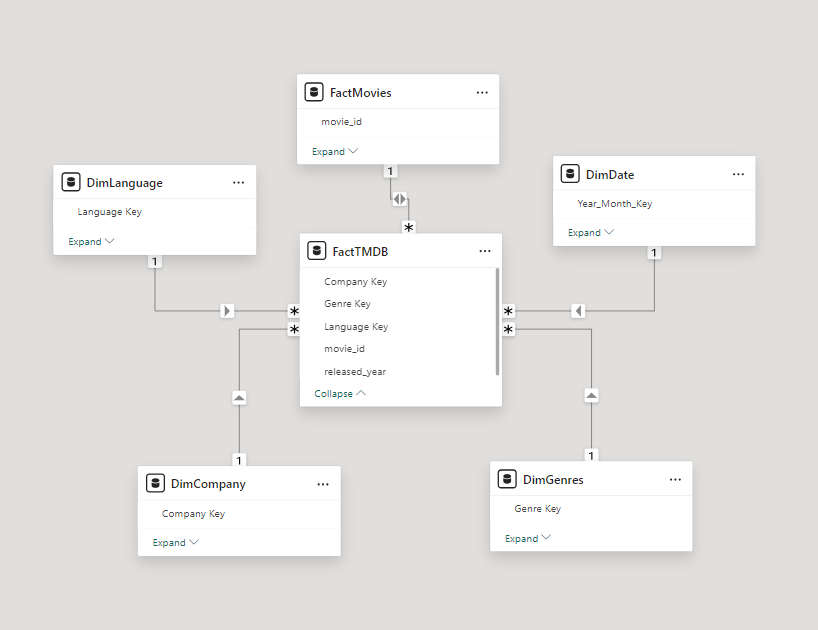

Following are size of the Power BI file.

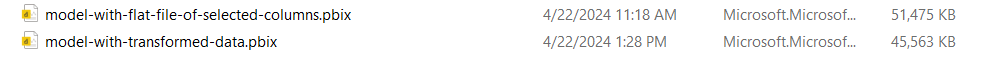

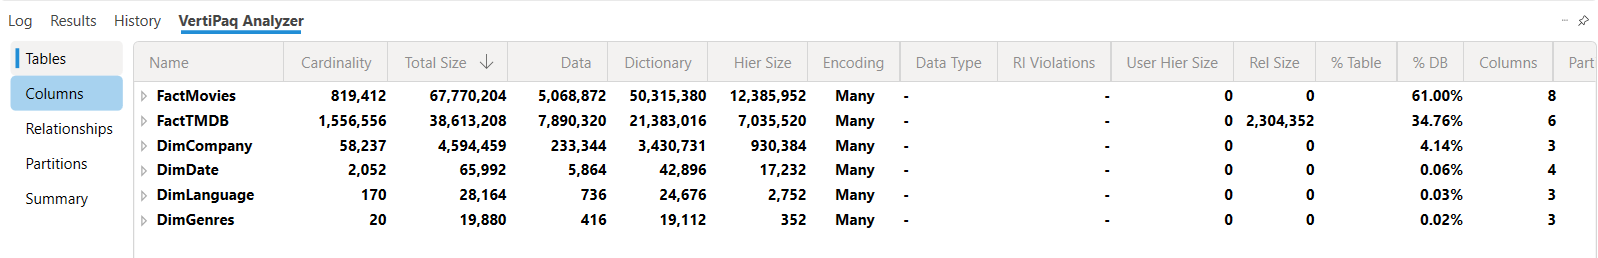

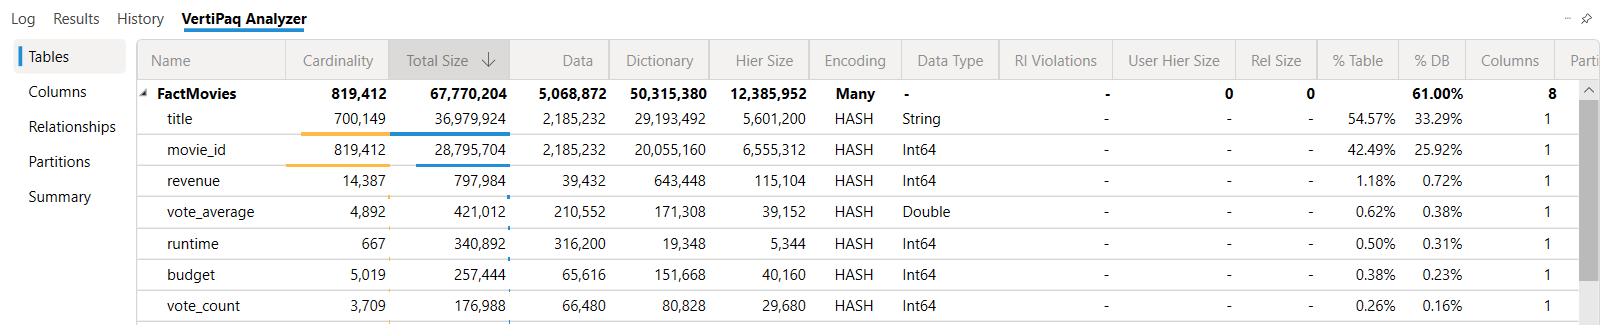

To reduce the size of the Power BI report, you can consider the following steps:

1. **Removing Unwanted Columns:** Identify columns that are not essential for your analysis or visualization and remove them from the dataset. This reduces the amount of data loaded into Power BI, resulting in a smaller file size and improved performance.
2. **Limiting the Number of Rows:** If your dataset contains a large number of rows but you only need a subset for your analysis, consider limiting the number of rows loaded into Power BI.

### After removing the unwanted column

Let say for the purpose of analysis we do not want the name of movies.

If we remove the title of the movie. We can further reduce the size of the file.

**Note: Removing the fields totally depends on your analysis objective and scope of the analysis (macro or micro).**


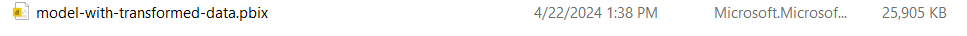

## My final submission Data Model

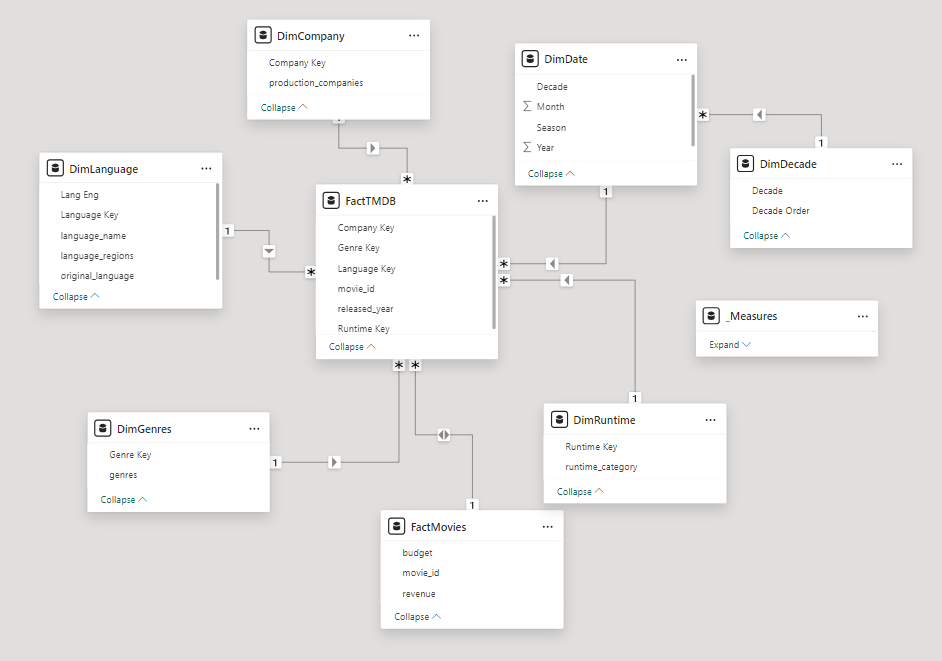

- I know there is Bi-directional relationship between the movies table and tmdb table and completely data ambiguity problem.
- I've experimented with various data models to address this issue. Unfortunately, these solutions resulted in more complex DAX measures and didn't fully resolve the data ambiguity problem.
- In my final submission, I chose not to use any fields from the movies table to filter the data. This decision was made to ensure the accuracy of the results and mitigate any potential data ambiguity issues.
- While I couldn't achieve a perfect solution, I'm always learning and seeking better ways to handle similar situations in the future. Your feedback is always welcome.